<a href="https://colab.research.google.com/github/Daniel-2003-python/IAyRedesN_ENE-JUN_2025/blob/main/Actividades/AF5_Procesamiento_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de Conjunto de Datos en Python

AUTORES:

DANIEL SILVA GARZA - 2109354 - N5

PEDRO DAMIAN ARGUELLO PEREZ - 2048101 - N5

OSCAR RAUL OSORIO MATRINEZ - 2004875 - N5

BRANDON BAROCIO - 1960720 - N5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Robot Sensors/robot_sensors.csv")
df.head()

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


In [ ]:
# Resumen estadístico antes de la limpieza
print("\nResumen estadístico antes de la limpieza:")
print(df.describe())

# Eliminar filas con valores nulos
df_clean = df.dropna()

# Detección de valores atípicos usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


Resumen estadístico antes de la limpieza:
        Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
count  1000.000000      970.000000        970.000000        970.000000
mean    499.500000       54.011809         25.203708         27.518110
std     288.819436       26.408040         14.632979          4.386129
min       0.000000       10.416882          0.160913         20.000175
25%     249.750000       30.581348         11.877176         23.890799
50%     499.500000       54.633590         25.874517         27.507535
75%     749.250000       76.891589         37.989158         31.409083
max     999.000000       99.974591         49.970686         34.967313


In [ ]:
# Aplicar eliminación de valores atípicos a todas las columnas excepto "Tiempo (s)"
columns_to_filter = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']
for col in columns_to_filter:
    df_clean = remove_outliers(df_clean, col)

# Resumen estadístico después de la limpieza
print("\nResumen estadístico después de la limpieza:")
print(df_clean.describe())

# Normalizacion de los Datos Numericos con MIN-MAX Sclaing
scaler = MinMaxScaler()
df_clean[columns_to_filter] = scaler.fit_transform(df_clean[columns_to_filter])


Resumen estadístico después de la limpieza:
       Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
count  913.000000      913.000000        913.000000        913.000000
mean   498.173056       54.079714         25.324031         27.538971
std    289.608036       26.423786         14.623216          4.377366
min      0.000000       10.416882          0.160913         20.000175
25%    248.000000       30.591835         12.060073         23.904303
50%    498.000000       55.136467         25.988697         27.546259
75%    746.000000       76.669176         38.051395         31.415119
max    999.000000       99.974591         49.970686         34.967313


In [ ]:
# Configuración de gráficos
plot_config = {
    'Distancia (cm)': {'color':'b', 'ylabel': 'Distancia (normalizada)'},
    'Velocidad (cm/s)': {'color': 'r', 'ylabel': 'Velocidad (normalizada)'},
    'Temperatura (°C)': {'color': 'g', 'ylabel': 'Temperatura (normalizada)'}
}

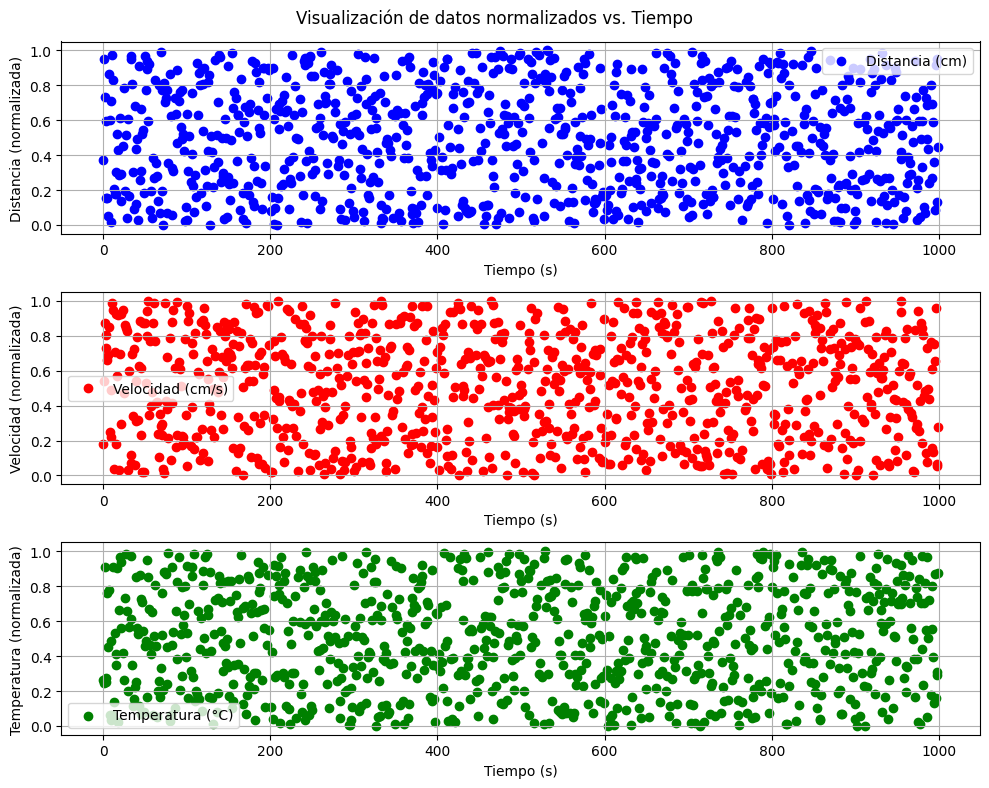

In [ ]:
# Gráficos optimizados
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_filter):
    plt.subplot(3, 1, i + 1)
    plt.scatter(df_clean['Tiempo (s)'], df_clean[col], color=plot_config[col]['color'], label=col)
    plt.xlabel('Tiempo (s)')
    plt.ylabel(plot_config[col]['ylabel'])
    plt.legend()
    plt.grid(True) # Agregar una cuadrícula para mejor interpretación

plt.suptitle("Visualización de datos normalizados vs. Tiempo") # Título general
plt.tight_layout()
plt.show()